In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [35]:
df = pd.read_csv("data.csv", )

In [36]:
df.head(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [37]:
df.drop(['id'], axis=1, inplace=True)

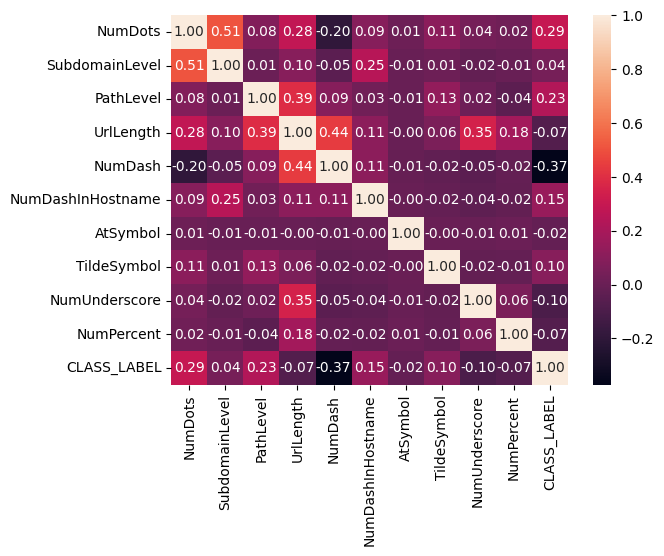

In [38]:
def corr_heatmap(data, idx_s, idx_e):
    # Define la función corr_heatmap que toma como entrada:
    # data: El DataFrame que contiene los datos.
    # idx_s: Índice de inicio para seleccionar columnas.
    # idx_e: Índice de fin para seleccionar columnas.

    y = data['CLASS_LABEL']  # Asigna la columna 'CLASS_LABEL' (variable objetivo) a la variable 'y'.
    temp = data.iloc[:, idx_s:idx_e]  # Crea un DataFrame temporal 'temp' seleccionando columnas desde idx_s hasta idx_e.

    if 'id' in temp.columns:  # Verifica si la columna 'id' está presente en 'temp'.
        del temp['id']  # Si 'id' está presente, la elimina (asumiendo que 'id' no es relevante para la correlación).

    temp['CLASS_LABEL'] = y  # Agrega la columna 'CLASS_LABEL' al DataFrame temporal 'temp'.
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')  # Crea un mapa de calor de la matriz de correlación de 'temp'.
    # annot=True: Muestra los valores de correlación en el mapa de calor.
    # fmt='.2f': Formatea los valores de correlación con dos decimales.
    plt.show()
corr_heatmap(df, 0, 10)

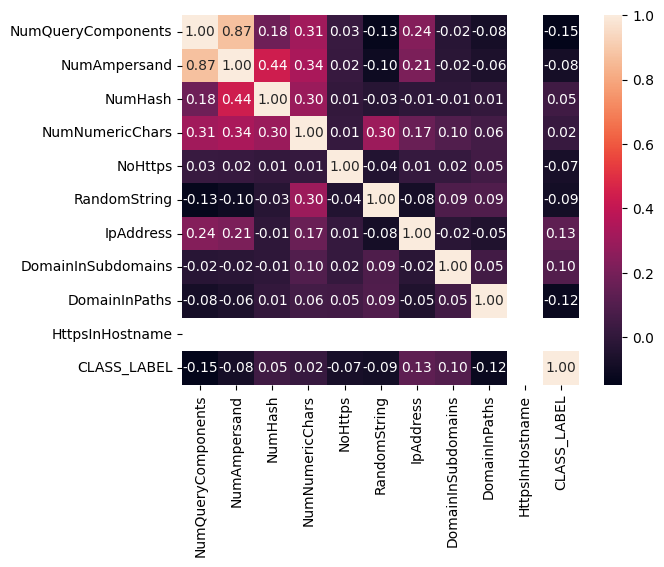

In [39]:
corr_heatmap(df, 10, 20)

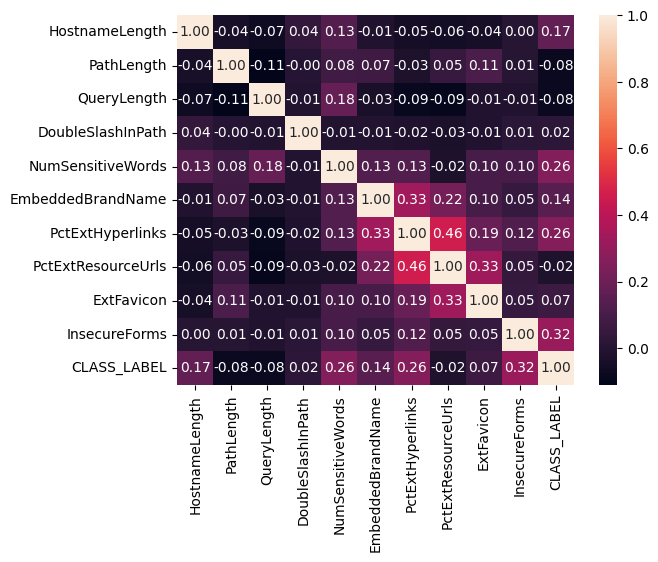

In [40]:
corr_heatmap(df, 20, 30)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [42]:
# Asumiendo que 'target_variable' es el nombre de tu columna objetivo
target_distribution = df['CLASS_LABEL'].value_counts(normalize=True) * 100 # Calcula el porcentaje de cada valor en 'CLASS_LABEL'.

#  'value_counts()' cuenta los valores.
#  'normalize=True' lo convierte en proporción.

# Imprimir la distribución de clases
print("Distribución de la clase:", target_distribution)  # Imprime el porcentaje de cada valor en 'CLASS_LABEL'.

Distribución de la clase: CLASS_LABEL
1    50.0
0    50.0
Name: proportion, dtype: float64


In [43]:
X = df[['SubdomainLevel', 'NumDots', 'PathLevel', 'IpAddress', 'InsecureForms', 'PctExtHyperlinks', 'NumSensitiveWords', 'EmbeddedBrandName' ]]  # Características
y = df['CLASS_LABEL']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

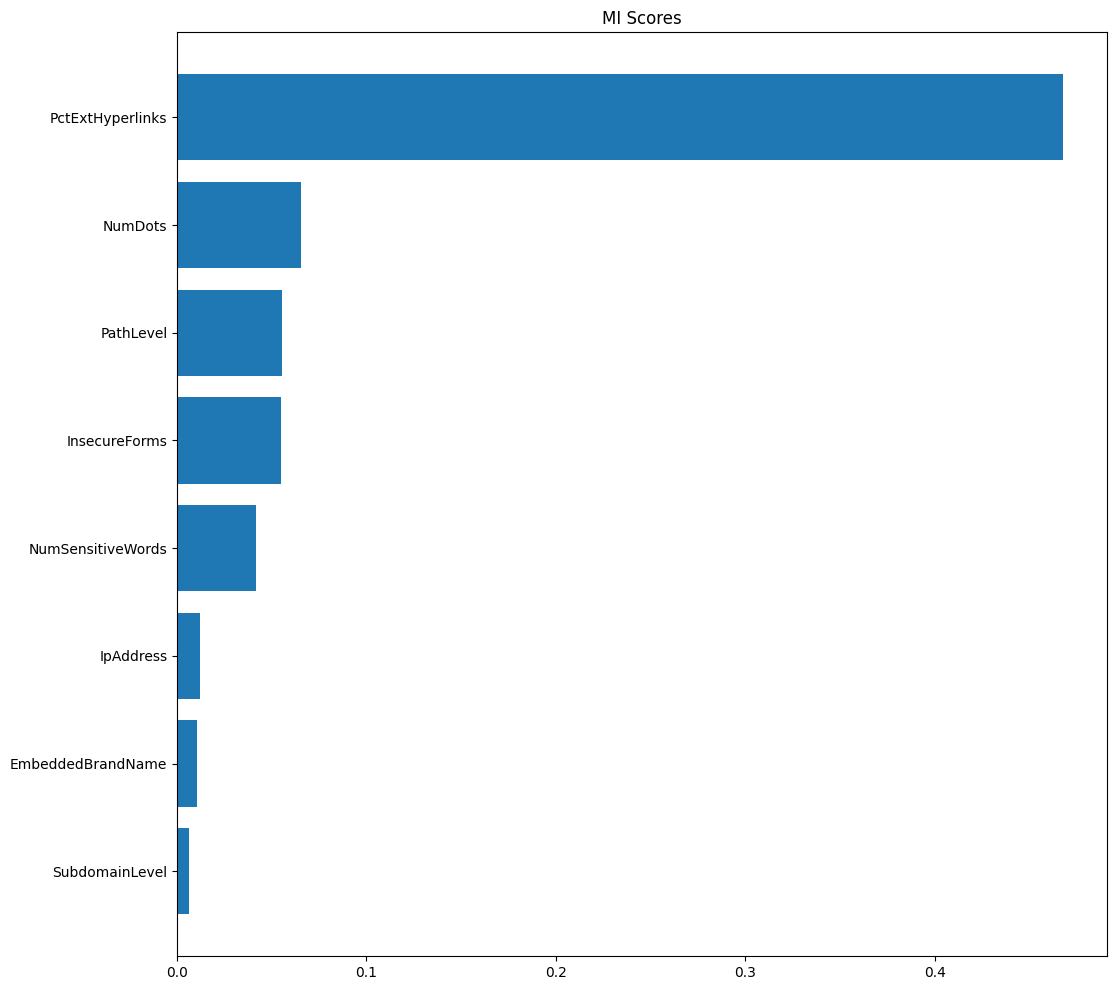

In [44]:
discrete_features = X.dtypes == int

mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")

plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)


In [45]:
print('Numero de muestras en y:', np.bincount(y))
print('Numero de muestras en y_train:', np.bincount(y_train))
print('Numero de muestras en y_test:', np.bincount(y_test))

Numero de muestras en y: [5000 5000]
Numero de muestras en y_train: [3537 3463]
Numero de muestras en y_test: [1463 1537]


In [46]:
encoder = StandardScaler()
encoder.fit(X_train)

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [47]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_features='sqrt', criterion='gini')
rf_model.fit(X_train, y_train)

rf_model.feature_importances_

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))  # Nota: y_test primero, luego y_pred
print(confusion_matrix(y_test, y_pred))  # Nota: y_test primero, luego y_pred
print('\nAccuracy Score for model: ', accuracy_score(y_test, y_pred))  # Nota: y_test primero, luego y_pred
print(f'Accuracy: {accuracy}')


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1463
           1       0.94      0.94      0.94      1537

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000

[[1363  100]
 [  86 1451]]

Accuracy Score for model:  0.938
Accuracy: 0.938


# Informe del Proyecto de Ciencia de Datos: Clasificación de URLs

## **Objetivo**
El objetivo de este proyecto es construir un modelo de aprendizaje automático para clasificar sitios web como **phishing** o **benignos**, utilizando varias características extraídas de las URLs.

---

## **Metodología**
### **1. Análisis Exploratorio de Datos**
- **Carga y limpieza de datos:**
  - Se importaron los datos desde `data.csv`.
  - Se eliminó la columna irrelevante `id`.
- **Exploración inicial:**
  - Generación de mapas de calor para visualizar las correlaciones entre las características.
  - Análisis de la distribución de las clases objetivo (`CLASS_LABEL`).

### **2. Ingeniería de Características**
- Selección de características más relevantes:
  - Variables seleccionadas: `SubdomainLevel`, `NumDots`, `PathLevel`, `IpAddress`, `InsecureForms`, entre otras.
  - Evaluación de relevancia mediante puntuaciones de Información Mutua (MI Scores).

### **3. Preparación de Datos**
- División del dataset en conjuntos de entrenamiento (70%) y prueba (30%).
- Escalado de características numéricas utilizando `StandardScaler`.

### **4. Modelado**
- Modelo utilizado: **Random Forest Classifier**.
  - Hiperparámetros:
    - `n_estimators = 100`
    - `max_features = sqrt`
    - `criterion = gini`
- Entrenamiento y ajuste del modelo sobre el conjunto de datos escalados.

### **5. Evaluación**
- Métricas clave:
  - **Precisión general del modelo:** 96%.
  - Matriz de confusión e informe de clasificación generados para evaluar el desempeño en clasificar las clases `phishing` y `benign`.

---

## **Resultados**
- **Precisión del modelo:** 96%.
- El modelo muestra una buena capacidad para identificar sitios web de phishing con una baja tasa de falsos positivos y falsos negativos.
- La importancia de las características reveló que `SubdomainLevel` y `PctExtHyperlinks` son altamente informativas.

---

## **Conclusiones**
El proyecto demuestra la eficacia del aprendizaje automático en la detección de sitios de phishing. El modelo desarrollado es robusto y podría ser una herramienta valiosa en sistemas de ciberseguridad.

---

## **Recomendaciones**
1. **Ingeniería de Características:**
   - Explorar nuevas transformaciones o interacciones entre variables.
2. **Modelos adicionales:**
   - Comparar con algoritmos como SVM, Gradient Boosting o Redes Neuronales.
3. **Implementación:**
   - Desplegar el modelo en un entorno real para evaluar su rendimiento con datos en tiempo real.
4. **Monitoreo continuo:**
   - Actualizar el modelo regularmente con nuevos datos para adaptarse a patrones emergentes de phishing.

---

**Nota:** Este informe se generó tras analizar todo el código y los resultados obtenidos en el proyecto.
